# Analyse de la structure électronique du CaCN2

## Téléchargement des modules et des fichiers 

In [91]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
from scipy.constants import hbar
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [92]:
mp_key = "wjMeCvxez5rqgsz8tYQIQIC7njLkvYiq"
mp_id = "mp-4124"

In [93]:
print("Téléchargement du fichier")
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
print("Téléchargement effectué avec succès")

Téléchargement du fichier


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement effectué avec succès


## Détermination de la bande interdite

In [94]:
print("Structure des bandes électroniques")
fig_el_bs_and_dos = get_plot_bs_and_dos(el_bs, el_dos, plot_range=[-4,7])
band_gap = el_bs.get_band_gap()
fig_el_bs_and_dos.show()
print(band_gap)

Structure des bandes électroniques


{'direct': False, 'energy': 3.5774, 'transition': 'Z-\\Gamma'}


Le graphe et les informations disponibles sur la bande d'énergie nous apprennent que le CaCN2 a une bande interdite indirecte. En effet, on voit que le maximum de la bande de valence ne se trouve pas à la même valeur de vecteur d'onde que le minimum de la bande interdite. La largeur de la bande interdite est de 3.58eV. Le vecteur d'onde de transition est le vecteur Z-$\Gamma$. Notons que $\Gamma$ correspond au point (0,0,0). Nous pouvons voir que la densité électronique est nulle dans les bandes interdites et qu'il y a une occupation électronique dans les bandes de conduction et de valence. Par ailleurs, la DOS est plus importate dans la bande de valence que dans la bande de conduction.  

## Direction dans laquelle la dernière bande de valence et la première bande de conduction présentent le plus et le moins de dispersion

La dispersion d'une bande électronique correspond à la variation d'énergie des électrons en fonction de leur vecteur d'onde. La dispersion est d'autant plus élévée que la pente entre deux points de la bande est importante.  

$\textbf{Première bande de conduction}$ 

Nous obtenons de ce code que la première bande de conduction est la bande numéro 12

In [95]:
cbm = el_bs.get_cbm()
print(cbm['band_index'])
print(cbm)

defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}), 'kpoint_index': [0, 71, 72], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f3e3f6cfcd0>, 'energy': 5.0321, 'projections': {<Spin.up: 1>: array([[0.0388, 0.0034, 0.0517, 0.0517],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0004, 0.0004],
       [0.    , 0.    , 0.0077, 0.0077],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0161, 0.    , 0.    , 0.    ],
       [0.011 , 0.    , 0.    , 0.    ],
       [0.0588, 0.    , 0.    , 0.    ]])}}


$\textbf{Dernière bande de valence}$ 

Nous obtenons de ce code que la dernière bande de valence est la bande numéro 11

In [96]:
vbm = el_bs.get_vbm()
print(vbm['band_index'])
print(vbm)

defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]})
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]}), 'kpoint_index': [57, 58, 133], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f3e447920a0>, 'energy': 1.4547, 'projections': {<Spin.up: 1>: array([[0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.0087, 0.    , 0.2983, 0.2983],
       [0.0004, 0.    , 0.014 , 0.014 ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])}}


$\textbf{Directions}$

In [97]:
bsp = BSPlotter(el_bs)
data = bsp.bs_plot_data()
energy = data['energy']
distances = data['distances']

valence = []
conduction = []

#On remplit les listes avec les pentes
for i in range(len(distances)) : 
    dx = distances[i][0] - distances[i][-1]
    
    dy_Val = energy['1'][i][11][0] - energy['1'][i][11][-1]
    dy_Cond = energy['1'][i][12][0] - energy['1'][i][12][-1]
    
    valence.append(abs(dy_Val/dx))
    conduction.append(abs(dy_Cond/dx))

#On trouve les valeurs des max et min de chaque bande
val_MAX = max(valence)
val_MIN = min(valence)
cond_MAX = max(conduction)
cond_MIN = min(conduction)
#On trouve les indices des max et min de chaque bande
val_max = valence.index(val_MAX)
val_min = valence.index(val_MIN)
cond_max = conduction.index(cond_MAX)
cond_min = conduction.index(cond_MIN)



print("Valeur de la dispersion maximale sur la dernière bande de valence :", val_MAX, "(eV)")
print("Valeur de la dispersion minimale sur la dernière bande de valence :", val_MIN, "(eV)")
print("Valeur de la dispersion maximale sur la première bande de conduction :", cond_MAX, "(eV)")
print("Valeur de la dispersion minimale sur la première bande de conduction :", cond_MIN, "(eV)")
print("\n")
print("Chemin de la dispersion maximale sur la dernière bande de valence :", val_max)
print("Chemin de la dispersion minimale sur la dernière bande de valence :", val_min)
print("Chemin de la dispersion maximale sur la première bande de conduction :", cond_max)
print("Cheminde la dispersion minimale sur la première bande de conduction :", cond_min)

Valeur de la dispersion maximale sur la dernière bande de valence : 1.5856393278055685 (eV)
Valeur de la dispersion minimale sur la dernière bande de valence : 0.0937291089165349 (eV)
Valeur de la dispersion maximale sur la première bande de conduction : 2.0149600303198834 (eV)
Valeur de la dispersion minimale sur la première bande de conduction : 0.0 (eV)


Chemin de la dispersion maximale sur la dernière bande de valence : 3
Chemin de la dispersion minimale sur la dernière bande de valence : 5
Chemin de la dispersion maximale sur la première bande de conduction : 1
Cheminde la dispersion minimale sur la première bande de conduction : 7


$\textbf{Création de la figure représentant la dispersion}$

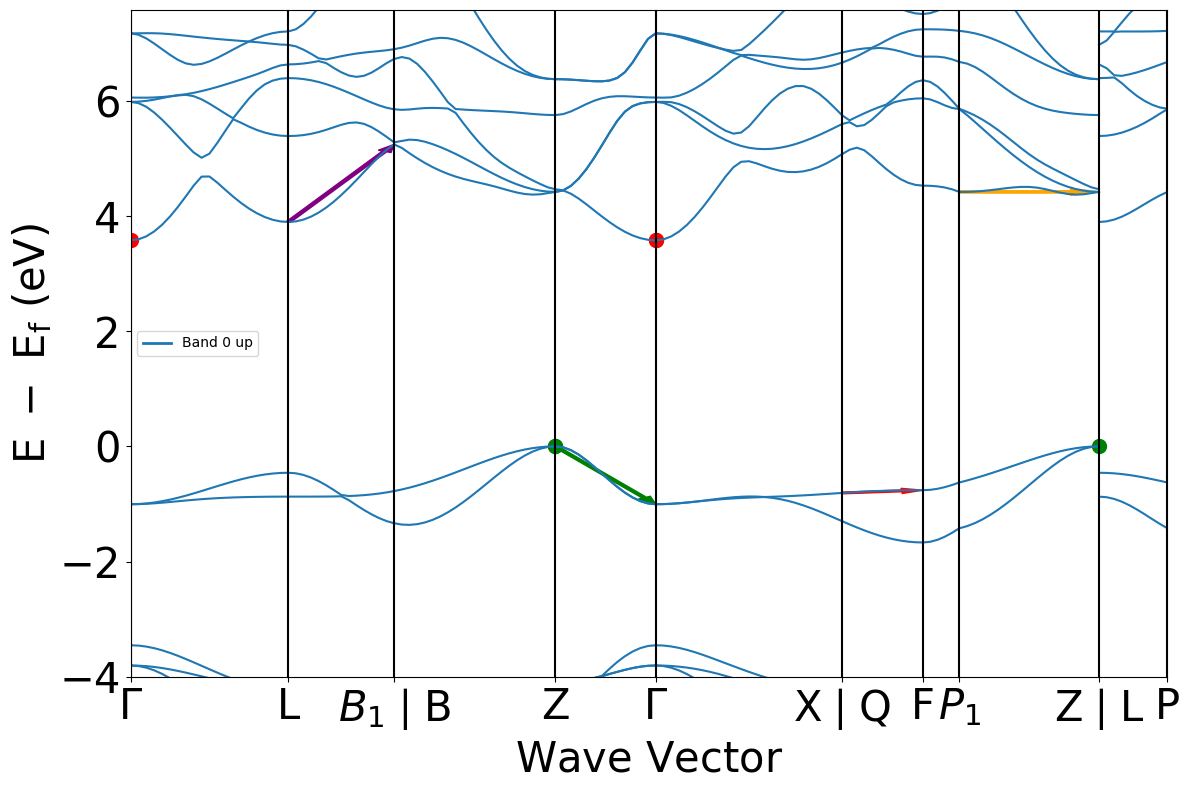

In [98]:
bsp.get_plot(vbm_cbm_marker = True)

#Dispersion min de la bande de valence 
plt.arrow(distances[val_min][0], energy['1'][val_min][11][0], 
          distances[val_min][-1]-distances[val_min][0], energy['1'][val_min][11][-1]-energy['1'][val_min][11][0],
          width = 0.03,length_includes_head=True,color='red') 

#Dispersion max de la bande de valence
plt.arrow(distances[val_max][0], energy['1'][val_max][11][0], 
          distances[val_max][-1]-distances[val_max][0], energy['1'][val_max][11][-1]-energy['1'][val_max][11][0],
          width = 0.03,length_includes_head=True,color='green') 

#Dispersion min de la bande de conduction
plt.arrow(distances[cond_min][0],energy['1'][cond_min][12][0], 
          distances[cond_min][-1]-distances[cond_min][0], energy['1'][cond_min][12][-1]-energy['1'][cond_min][12][0],
          width = 0.04,length_includes_head=True,color='orange')

#Dispersion max de la bande de conduction
plt.arrow(distances[cond_max][0], energy['1'][cond_max][12][0], 
          distances[cond_max][-1]-distances[cond_max][0], energy['1'][cond_max][12][-1]-energy['1'][cond_max][12][0],
          width = 0.03,length_includes_head=True,color='purple')

Grâce à notre code et au graphique, nous trouvons que la dispersion de la dernière bande de valence est maximale sur le chemin $Z-\Gamma$ (3), avec une valeur de 1.59$[eV]$ et est minimale sur le chemin $Q-F$ (5), avec une valeur de 0.094$[eV]$. La dispersion de la première bande de conduction est maximale sur le chemin $L-B_1$ (1) avec une valeur de 2$[eV]$  et minimale sur le chemin $P_1-Z$ (7), avec une valeur de 0$[eV]$. 

## Calcul de la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction

Pour effectuer ce calcul, nous supposons que la dispersion est parabolique. Cela signifie que nous pouvons écrire l'énergie comme : 

 \begin{equation}
E(k) = \frac{\hbar^2 k^2}{2m^*}
\end{equation}
avec $k^2 = k_x^2 + k_y^2 + k_z^2$. En renversant l'équation, nous obtenons pour la masse effective $m^*$ : 
\begin{equation}
m^* = \frac{\hbar^2 k^2}{2E(k)}
\end{equation}
Nous pouvons également écrire cette équation : 
\begin{equation}
m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}
\end{equation}

Puisque nous supposons une dispersion parabolique, nous pouvons calculer les coefficients d'une interpolation du second degré du type \begin{equation}
E(k) \approx ak^2 + bk +c
\end{equation}

Nous pouvons alors trouver $\frac{d^2E}{dk^2}$, qui sera donné par 2a. Cela nous permettra de calculer la masse effective. Nous ajusterons une première approximation autour du maximum de la bande de valence et une seconde autour du minimum de la bande de conduction. 

In [99]:
#Constantes 
eV = 1.602e-19
A = 1e-10

## Masse effective dans la dernière bande de valence

Nous approximons E par la parabole :  -5.129183190199034 k^2 + 27.37600130095738 k + -36.52697071600421
La masse effective au sommet de la dernière bande de valence est de :  6.767240396510046e-31 kg


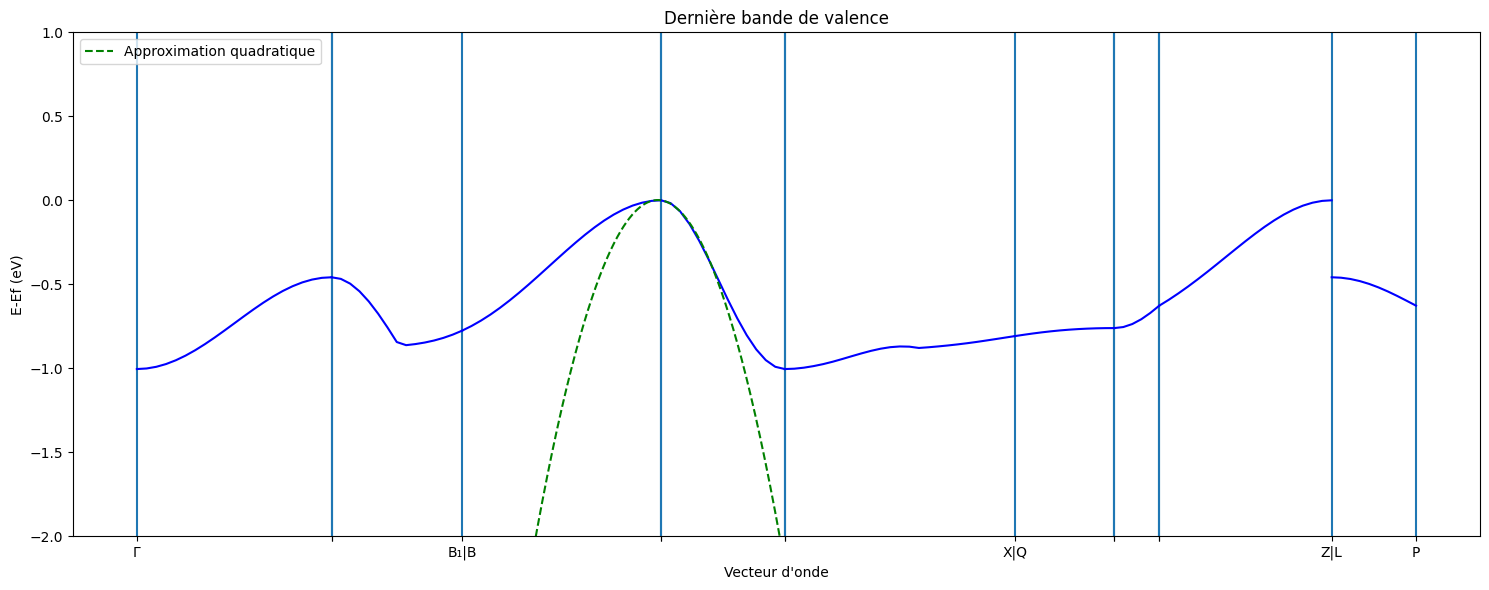

In [100]:
fig, ax = plt.subplots(figsize=(15, 6))
dis = data.get('ticks').get('distance')

for d in dis : 
    ax.axvline(d)
    
for i in range(len(distances)):
    ax.plot(distances[i], energy.get('1')[i][11], 'b')
ax.set_xlabel('Vecteur d\'onde')
ax.set_xticks(dis)
ax.set_xticklabels(['\u0393', 'L', '', 'B\u2081|B', 'Z', '', '\u0393', '', 'X|Q', 'F', '', 'P\u2081', '', 'Z|L', 'P'])
ax.set_ylabel('E-Ef (eV)')
ax.set_title('Dernière bande de valence')
ax.set_ylim(-2, 1)
k_points = np.zeros(3)
energies = np.zeros(3)

#On choisit 3 points
k_points[0], energies[0] = distances[2][-2], energy.get('1')[2][11][-2]
k_points[1], energies[1] = data.get('vbm')[1]
k_points[2], energies[2] = distances[3][2], energy.get('1')[3][11][2]

interpol = np.polyfit(k_points, energies, 2)
print('Nous approximons E par la parabole : ', interpol[0], 'k^2 +', interpol[1], 'k +', interpol[2])

m_eff = abs(hbar**2 / (2*interpol[0]*eV*A**2))
print('La masse effective au sommet de la dernière bande de valence est de : ', m_eff, 'kg')
x = np.linspace(distances[2][0], distances[3][-1], 1000)
ax.plot(x, np.polyval(interpol, x), 'g--', label='Approximation quadratique')
ax.legend()
plt.tight_layout()
plt.show()



## Masse effective dans la première bande de conduction

Nous approximons E par la parabole :  9.279875952649308 k^2 + -61.356470739817524 k + 104.99449772551972
La masse effective au minimum de la première bande de conduction est de 3.7403965163893935e-31 kg


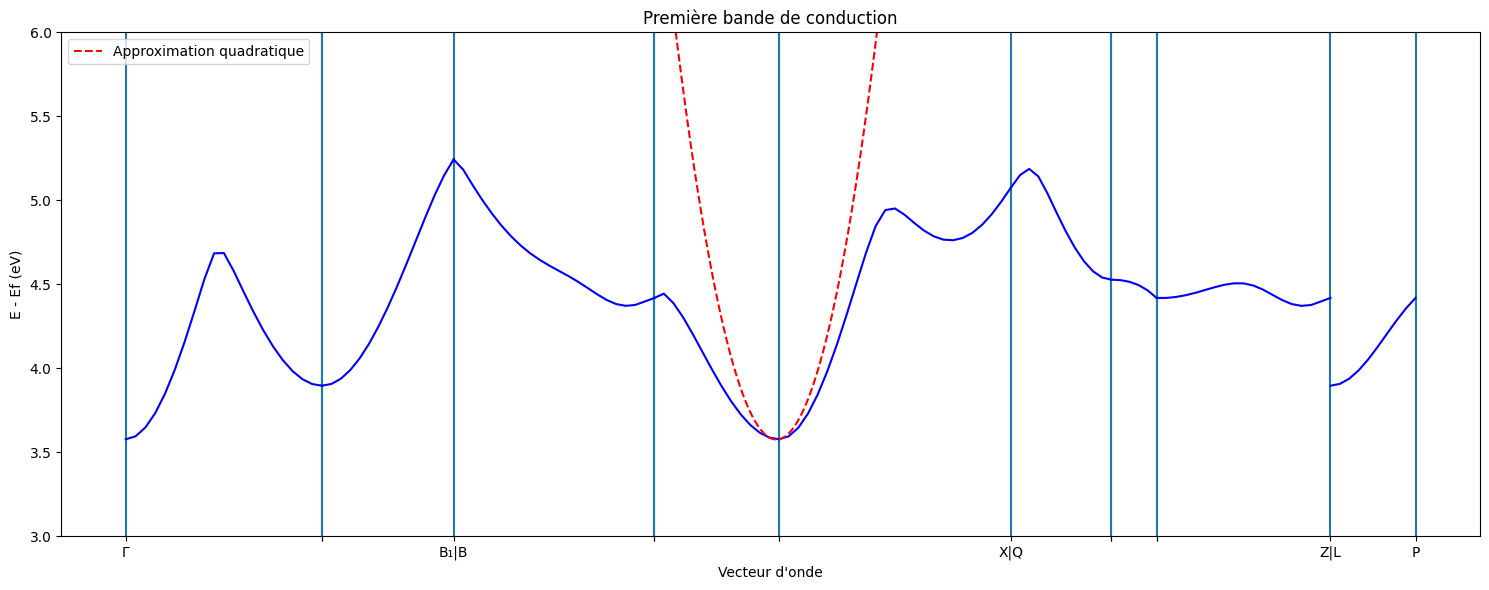

In [101]:
fig2, ax2 = plt.subplots(figsize=(15, 6))

for d in dis:
    ax2.axvline(d)

for i in range(len(distances)):
    ax2.plot(distances[i], energy.get('1')[i][12], 'b')

ax2.set_xticks(dis)
ax2.set_xticklabels(['\u0393', 'L', '', 'B\u2081|B', 'Z', '', '\u0393', '', 'X|Q', 'F', '', 'P\u2081', '', 'Z|L', 'P'])
ax2.set_xlabel('Vecteur d\'onde')
ax2.set_ylabel('E - Ef (eV)')
ax2.set_title('Première bande de conduction')
ax2.set_ylim(3, 6)

k_points2= np.zeros(3)
energies2 = np.zeros(3)

k_points2[0], energies2[0] = distances[3][-2], energy.get('1')[3][12][-2]
k_points2[1], energies2[1] = data.get('cbm')[1]
k_points2[2], energies2[2] = (distances[4][1] + distances[4][2]) / 2, energy.get('1')[4][12][2]

interpol2 = np.polyfit(k_points2, energies2, 2)
print('Nous approximons E par la parabole : ', interpol2[0], 'k^2 +', interpol2[1], 'k +', interpol2[2])
m_eff2 = abs(hbar**2/(2*interpol2[0] * eV * A**2))
print('La masse effective au minimum de la première bande de conduction est de', m_eff2, 'kg')

x2 = np.linspace(distances[3][0], distances[4][-1], 1000)
ax2.plot(x2, np.polyval(interpol2, x2), 'r--', label='Approximation quadratique')

ax2.legend()
plt.tight_layout()
plt.show()